# **_Data Science 4th Project_**

<span style="font-size:12.0pt;line-height:115%;
font-family:&quot;robotoregular&quot;,serif;mso-fareast-font-family:&quot;Times New Roman&quot;;
mso-bidi-font-family:&quot;Open Sans&quot;;color:#333333;mso-ansi-language:EN-US;
mso-fareast-language:EN-US;mso-bidi-language:AR-SA">The dataset includes variables related to a direct marketing campaign of a Portuguese banking institution. Our goal is to predict if an individual will become a customer&nbsp; or not.</span>

In [60]:
# Loading all important packages required through out the project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy.random as nr
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
import sklearn.metrics as sklm
from sklearn.neural_network import MLPClassifier


In [62]:
# Converting data from csv file into a pandas dataframe
df_bank = pd.read_csv("bank-additional-full.csv", delimiter=";")
pd.set_option("display.max_columns", None)
print(df_bank.shape)
df_bank.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [64]:
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [65]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [66]:
df_bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [67]:
df_bank.shape

(41188, 21)

In [68]:
# Dropping out the duplicates by keeping only the last entry of the duplicate records.
df_bank.drop_duplicates(keep = "last", inplace = True)
df_bank.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [69]:
num_cols = df_bank.columns[df_bank.dtypes != object]
cat_cols = df_bank.columns[df_bank.dtypes == object]

In [70]:
df_bank[num_cols].isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [71]:
(df_bank.astype(object) == " ").any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Result shows a huge amount of No percentage as compared to Yes percentage which is clearly indicating a huge problem of class imbalance, I will remove later on. First Analyze the features, first numerical and then categorical.

-----Analyzing age Feature-----
Mean of age:40.02
Minimum age:17
Maximum age:98
Value counts for age sorted in decreasing order
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


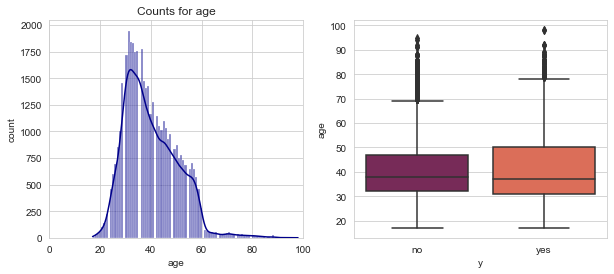

In [72]:
print("-----Analyzing age Feature-----")
print("Mean of age:" + str(round(df_bank["age"].mean(), 2)))
print("Minimum age:" + str(round(df_bank["age"].min(), 2)))
print("Maximum age:" + str(round(df_bank["age"].max(), 2)))
print("Value counts for age sorted in decreasing order" )
print(df_bank["age"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="age", color="darkblue", kde=True)
plt.xlim(0,100)
plt.title('Counts for age')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="age", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("age")# Set text for y axis
plt.show()

-----Analyzing duration Feature-----
Mean of duration:258.32
Minimum duration:0
Maximum duration:4918
Value counts for duration sorted in decreasing order
90      170
85      170
136     168
73      167
124     163
       ... 
1594      1
1530      1
2231      1
1306      1
2015      1
Name: duration, Length: 1544, dtype: int64


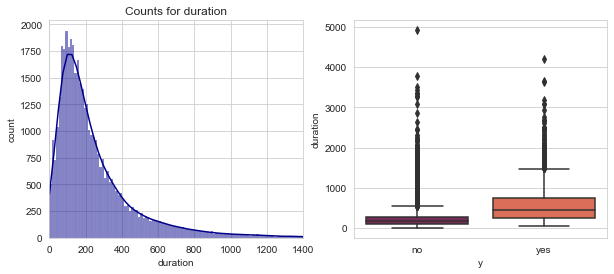

In [73]:
print("-----Analyzing duration Feature-----")
print("Mean of duration:" + str(round(df_bank["duration"].mean(), 2)))
print("Minimum duration:" + str(round(df_bank["duration"].min(), 2)))
print("Maximum duration:" + str(round(df_bank["duration"].max(), 2)))
print("Value counts for duration sorted in decreasing order" )
print(df_bank["duration"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="duration", color="darkblue", kde=True)
plt.xlim(0,1400)
plt.title('Counts for duration')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="duration", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("duration")# Set text for y axis
plt.show()

-----Analyzing nr.employed Feature-----
Mean of nr.employed:5167.03
Minimum nr.employed:4963.6
Maximum nr.employed:5228.1
Value counts for nr.employed sorted in decreasing order
5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64


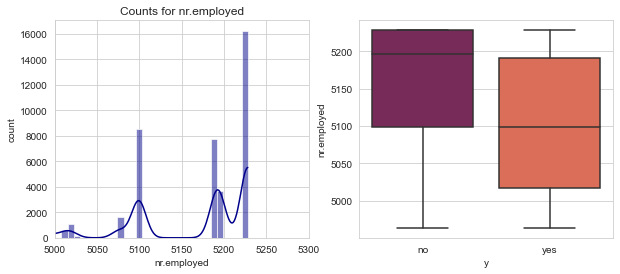

In [74]:
print("-----Analyzing nr.employed Feature-----")
print("Mean of nr.employed:" + str(round(df_bank["nr.employed"].mean(), 2)))
print("Minimum nr.employed:" + str(round(df_bank["nr.employed"].min(), 2)))
print("Maximum nr.employed:" + str(round(df_bank["nr.employed"].max(), 2)))
print("Value counts for nr.employed sorted in decreasing order" )
print(df_bank["nr.employed"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="nr.employed", color="darkblue", kde=True)
plt.xlim(5000,5300)
plt.title('Counts for nr.employed')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="nr.employed", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("nr.employed")# Set text for y axis
plt.show()

-----Analyzing emp.var.rate Feature-----
Mean of emp.var.rate:0.08
Minimum emp.var.rate:-3.4
Maximum emp.var.rate:1.4
Value counts for emp.var.rate sorted in decreasing order
 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64


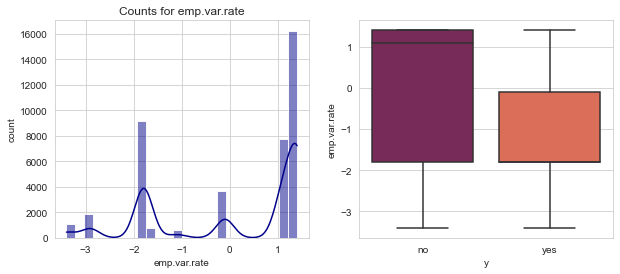

In [75]:
print("-----Analyzing emp.var.rate Feature-----")
print("Mean of emp.var.rate:" + str(round(df_bank["emp.var.rate"].mean(), 2)))
print("Minimum emp.var.rate:" + str(round(df_bank["emp.var.rate"].min(), 2)))
print("Maximum emp.var.rate:" + str(round(df_bank["emp.var.rate"].max(), 2)))
print("Value counts for emp.var.rate sorted in decreasing order" )
print(df_bank["emp.var.rate"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="emp.var.rate", color="darkblue", kde=True)
plt.title('Counts for emp.var.rate')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="emp.var.rate", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("emp.var.rate")# Set text for y axis
plt.show()

-----Analyzing cons.price.idx Feature-----
Mean of cons.price.idx:93.58
Minimum cons.price.idx:92.2
Maximum cons.price.idx:94.77
Value counts for cons.price.idx sorted in decreasing order
93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64


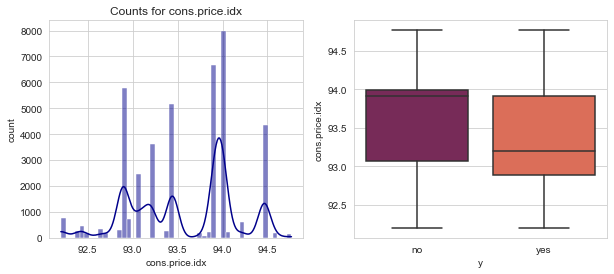

In [76]:
print("-----Analyzing cons.price.idx Feature-----")
print("Mean of cons.price.idx:" + str(round(df_bank["cons.price.idx"].mean(), 2)))
print("Minimum cons.price.idx:" + str(round(df_bank["cons.price.idx"].min(), 2)))
print("Maximum cons.price.idx:" + str(round(df_bank["cons.price.idx"].max(), 2)))
print("Value counts for cons.price.idx sorted in decreasing order" )
print(df_bank["cons.price.idx"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="cons.price.idx", color="darkblue", kde=True)
plt.title('Counts for cons.price.idx')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="cons.price.idx", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("cons.price.idx")# Set text for y axis
plt.show()

-----Analyzing cons.conf.idx Feature-----
Mean of cons.conf.idx:-40.5
Minimum cons.conf.idx:-50.8
Maximum cons.conf.idx:-26.9
Value counts for cons.conf.idx sorted in decreasing order
-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64


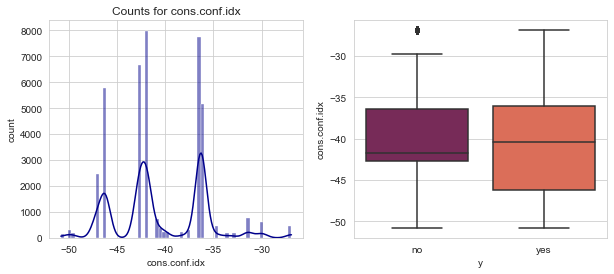

In [77]:
print("-----Analyzing cons.conf.idx Feature-----")
print("Mean of cons.conf.idx:" + str(round(df_bank["cons.conf.idx"].mean(), 2)))
print("Minimum cons.conf.idx:" + str(round(df_bank["cons.conf.idx"].min(), 2)))
print("Maximum cons.conf.idx:" + str(round(df_bank["cons.conf.idx"].max(), 2)))
print("Value counts for cons.conf.idx sorted in decreasing order" )
print(df_bank["cons.conf.idx"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="cons.conf.idx", color="darkblue", kde=True)
plt.title('Counts for cons.conf.idx')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="cons.conf.idx", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("cons.conf.idx")# Set text for y axis
plt.show()

-----Analyzing euribor3m Feature-----
Mean of euribor3m:3.62
Minimum euribor3m:0.63
Maximum euribor3m:5.04
Value counts for euribor3m sorted in decreasing order
4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
1.047       1
0.933       1
3.329       1
3.816       1
1.574       1
Name: euribor3m, Length: 316, dtype: int64


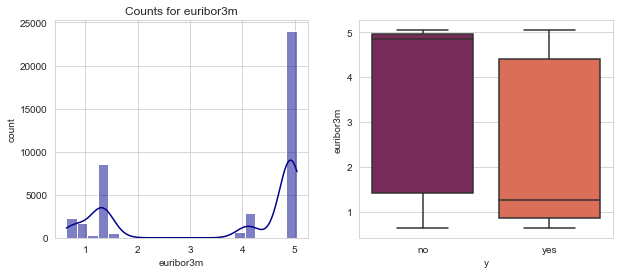

In [78]:
print("-----Analyzing euribor3m Feature-----")
print("Mean of euribor3m:" + str(round(df_bank["euribor3m"].mean(), 2)))
print("Minimum euribor3m:" + str(round(df_bank["euribor3m"].min(), 2)))
print("Maximum euribor3m:" + str(round(df_bank["euribor3m"].max(), 2)))
print("Value counts for euribor3m sorted in decreasing order" )
print(df_bank["euribor3m"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="euribor3m", color="darkblue", kde=True)
plt.title('Counts for euribor3m')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="euribor3m", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("euribor3m")# Set text for y axis
plt.show()

-----Analyzing campaign Feature-----
Mean of campaign:2.57
Minimum campaign:1
Maximum campaign:56
Value counts for campaign sorted in decreasing order
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
26        8
28        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
42        2
40        2
41        1
56        1
39        1
37        1
Name: campaign, dtype: int64


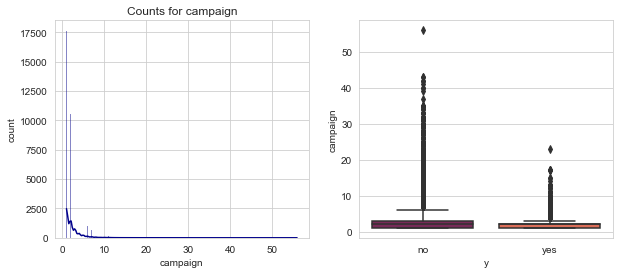

In [79]:
print("-----Analyzing campaign Feature-----")
print("Mean of campaign:" + str(round(df_bank["campaign"].mean(), 2)))
print("Minimum campaign:" + str(round(df_bank["campaign"].min(), 2)))
print("Maximum campaign:" + str(round(df_bank["campaign"].max(), 2)))
print("Value counts for campaign sorted in decreasing order" )
print(df_bank["campaign"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="campaign", color="darkblue", kde=True)
plt.title('Counts for campaign')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="campaign", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("campaign")# Set text for y axis
plt.show()

-----Analyzing pdays Feature-----
Mean of pdays:962.46
Minimum pdays:0
Maximum pdays:999
Value counts for pdays sorted in decreasing order
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64


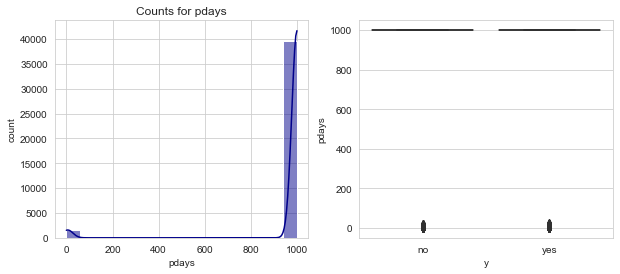

In [80]:
print("-----Analyzing pdays Feature-----")
print("Mean of pdays:" + str(round(df_bank["pdays"].mean(), 2)))
print("Minimum pdays:" + str(round(df_bank["pdays"].min(), 2)))
print("Maximum pdays:" + str(round(df_bank["pdays"].max(), 2)))
print("Value counts for pdays sorted in decreasing order" )
print(df_bank["pdays"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="pdays", color="darkblue", kde=True)
plt.title('Counts for pdays')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.set_style("whitegrid")
sns.boxplot(x="y", y="pdays", data=df_bank, palette="rocket")
plt.xlabel("y") # Set text for the x axis
plt.ylabel("pdays")# Set text for y axis
plt.show()

-----Analyzing previous Feature-----
Mean of previous:0.17
Minimum previous:0
Maximum previous:7
Value counts for previous sorted in decreasing order
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


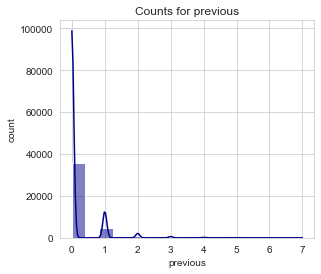

In [81]:
print("-----Analyzing previous Feature-----")
print("Mean of previous:" + str(round(df_bank["previous"].mean(), 2)))
print("Minimum previous:" + str(round(df_bank["previous"].min(), 2)))
print("Maximum previous:" + str(round(df_bank["previous"].max(), 2)))
print("Value counts for previous sorted in decreasing order" )
print(df_bank["previous"].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
sns.histplot(data=df_bank, x="previous", color="darkblue", kde=True)
plt.title('Counts for previous')
plt.ylabel('count')
plt.show()


I have analyzed numerical features in great detail by plotting histogram and box plot for each variable. I have also taken help by value\_counts, just to get the idea of values numerically and my findings with these numerical features are:

Age =\> There is a normal distribution but right skewed, which shows that values of age are overlapping with some outliers. Both the customer sets having "yes" and "no" values have median around 40 so this feature is not good enough to prodict the model's test values.

Duration =\> This attribute highly affects the output target (e.g if duration = 0 then y="no"). Yet the duration is not known before a call is performed. Also, after the end of the call y is obviously known, which shows the variance in data.

Campaign =\> It represents the number of contacts during this campaign, histogram shows that majority of the customers were contacted less number of times as compared to some which were contacted more, hence i am assuming that more the value, least the customer is interested in taking the subscription, which is also proved by the box plot of "no" showing median around 3 and a great number of outliers.

pdays and previous =\> These features are related to the previous contact with the customer. Majority of the customers were not previously contacted. So the customers contacted are treating as small circles in boxplot.

emp.var.rate (quarterly indicator), cons.price.idx (monthly indicator, cons.conf.idx (monthly indicator) =\> Consumer Confidence Index is an economic indicator to measure consumer confidence whereas Consumer Price Index measures the change in prices paid by consumers for goods and services. But these features have so many overlapping values, which prove not to be the good indicator feature for prediction of output target. This is only an assumption which will be proved later on.

euribor3m =\> Euribor 3 months rate which is the average interest rate at which eurozone banks offer unsecured short-termlending on the interbank market. From the box plot, there is a clear difference between the median of target values in "yes" and "no" categories. So this can be the good indicator.

nr.employed =\> number of employes shown by target feature in "yes" and "no" category are almost near to equal which represents that this is not the good feature to train our model.

Lets draw a correlation matrix for our numeric categories

Correlation Matrix


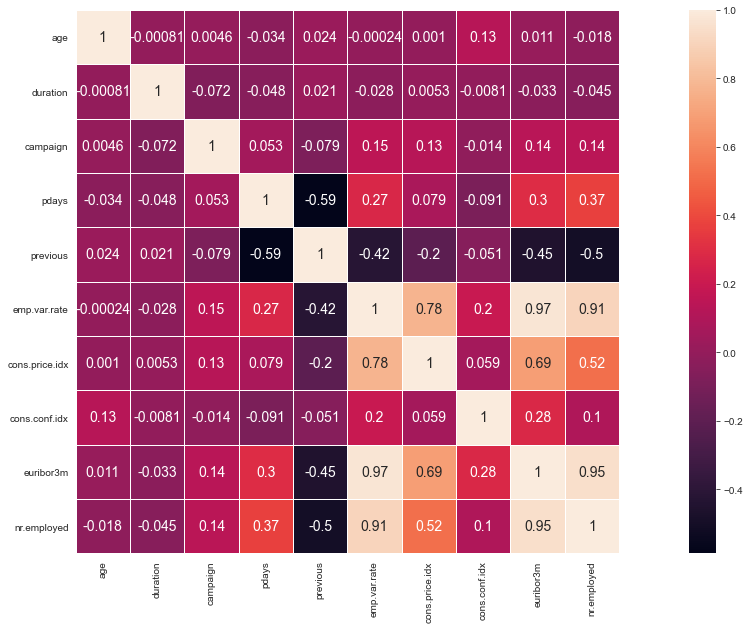

In [82]:
print("Correlation Matrix")
correlation = df_bank[num_cols].corr(method = "pearson")
plt.figure(figsize=(25,10))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, linewidths=.5, annot_kws={'size':14})
plt.show()

I applied the heatmap method to determine correlation between the numerical features of df\_bank, there is a strong positive relationship between emp.var.rate and euribor3m with the correlation of 0.97 or 97%.

Also the same emp.var.rate attribute has a strong positive with nr.employed at 0.91 or 91% and cons.price.idx at 0.78 or 78%.

So overall i found a high correlation between 4 columns based on the Heat Map Method. These columns are cons.price.idx, euribor3m, nr.employed and emp.var.rate. Now i am going to apply heat method on these four features seperately to select only one feature among all four.

Correlation Matrix between strongly corelated features


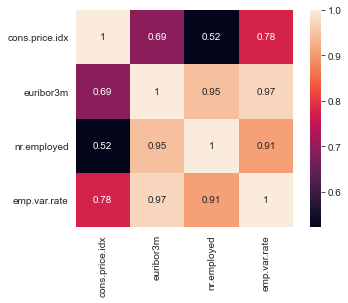

In [83]:
print("Correlation Matrix between strongly corelated features")
correlation = df_bank[['cons.price.idx', 'euribor3m', 'nr.employed', 'emp.var.rate']].corr(method = "pearson")
sns.heatmap(correlation, vmax=1, square=True, annot=True)
plt.show()

Seeing this correlation matrix, i am selecting nr.employed and dropping the remaining three from the dataframe. I am also excluding "duration" attribute from my dataframe because it highly affects the output and it will make the model biased and i really want to have the realistic predictive model. It is also because the duration remain unknown before a call to the client was made.

In [84]:
df_bank = df_bank.drop(['cons.price.idx', 'euribor3m', 'emp.var.rate', 'duration'], axis=1)

The numeric attribute named pdays means that number of days that passed by after the client was last contacted from a previous campaign. 999 means that client was not previously contacted. So I convert that pdays numerical to categorical. If the value is 999, i equate it to 0 and for remaining values, I put1. Then dropped the "pdays" columns and set new columns as "pdays\_cat"

In [85]:
df_bank['pdays_cat'] = [0 if p==999 else 1 for p in df_bank['pdays']]
df_bank = df_bank.drop(['pdays'], axis=1)
num_cols = num_cols.drop('pdays')
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'cons.conf.idx', 'nr.employed', 'y', 'pdays_cat'],
      dtype='object')

<ipython-input-86-92fff6035f3f>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (6,4))


<Figure size 432x288 with 0 Axes>

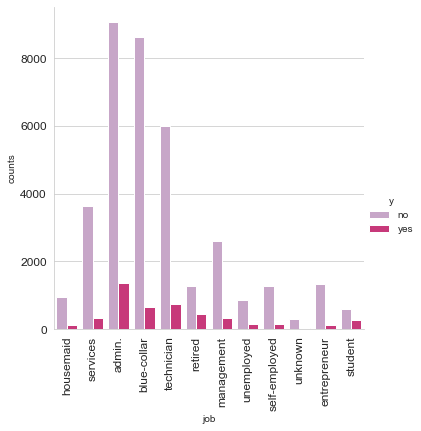

<Figure size 432x288 with 0 Axes>

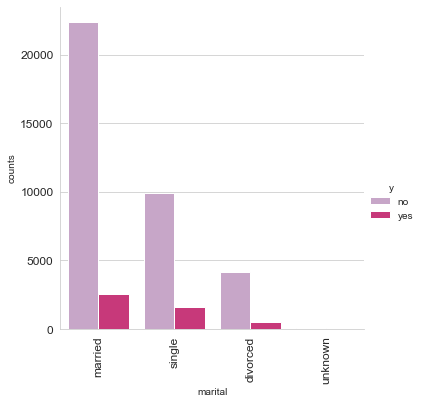

<Figure size 432x288 with 0 Axes>

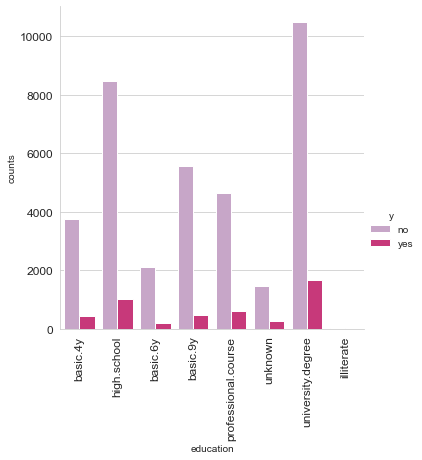

<Figure size 432x288 with 0 Axes>

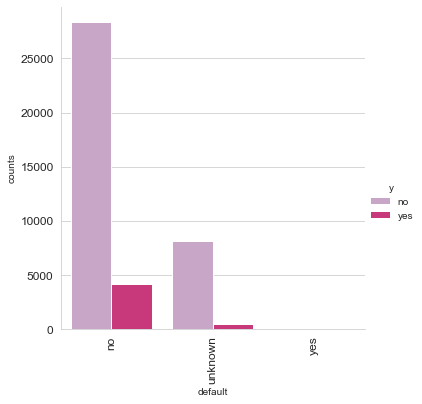

<Figure size 432x288 with 0 Axes>

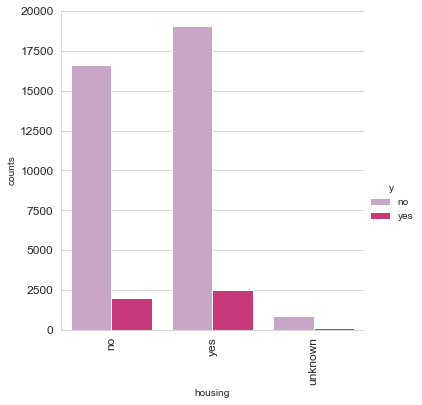

<Figure size 432x288 with 0 Axes>

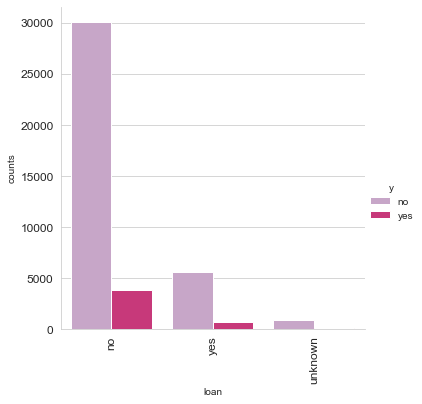

<Figure size 432x288 with 0 Axes>

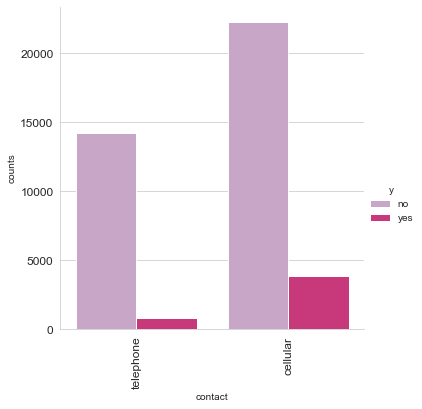

<Figure size 432x288 with 0 Axes>

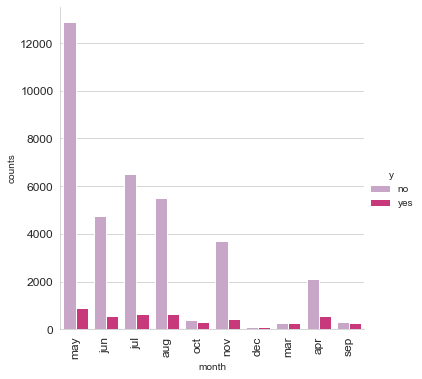

<Figure size 432x288 with 0 Axes>

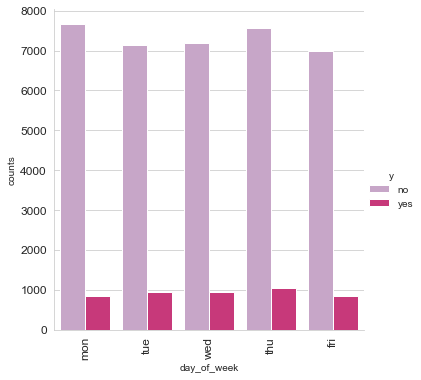

<Figure size 432x288 with 0 Axes>

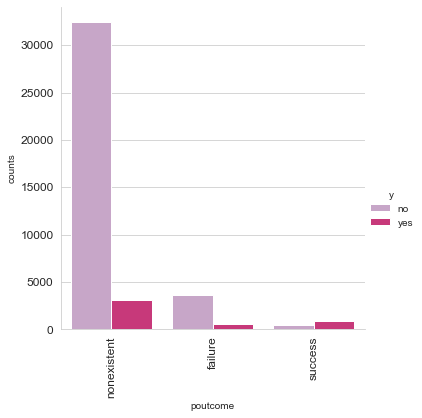

<Figure size 432x288 with 0 Axes>

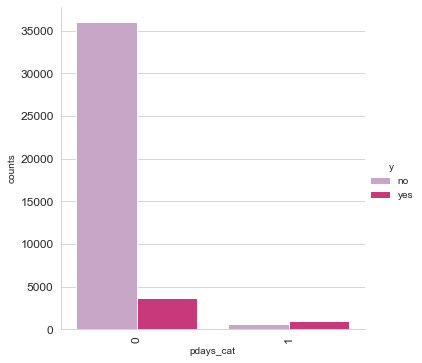

In [86]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'pdays_cat']

def plot_catcols(df_bank, cols):
    for col in cols:
        plt.figure(figsize = (6,4))
        sns.set_style("whitegrid")
        ax = sns.catplot(x=col, hue="y", kind="count", data=df_bank, palette="PuRd")
        ax.set(xlabel =col, ylabel ='counts')
        locs, labels = plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.setp(labels, rotation=90)


plot_catcols(df_bank, cat_cols)

Jobs =\>  Admin and Blue collar jobs have the highest value in "yes" class for the target feature.

marital =\> Married people take the subscription more!

education =\> More a person gets educated, he will be more interested to take the subcription.

default and loan  =\> Those customers who have credit in account or already taken loan are not much willing to take subscription.

housing =\> The customers who have taken house loans or not, they have a neutral reaction towards subcription.

contact =\> Customers having cellular contact can be the target customers.

month =\> December being the month of vacations, customers dont want to get involved in any financial involvements, they just want to enjoy and opposite case for May-August.

day\_of\_week =\> Mon-Fri have a very balanced data.

poutcome =\> Nonexistent customers who were not taken subscription previously can be interested to take it now.

From the above exploratory data analysis, i found that there is a huge class imbalance problem in data. Class Imbalance is s common problem in machine learning, especially in classification problems. Imabalnce data can hamper our model accuracy big time. Lets how much data is imbalanced.

no     36537
yes     4639
Name: y, dtype: int64
Percentage of Yes = 11.27%
Percentage of No = 88.73%


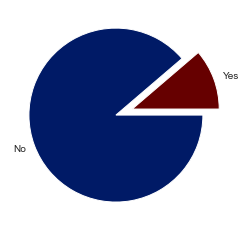

In [87]:
yes_percentage = df_bank[df_bank['y'] == "yes"].value_counts().sum() * 100 / len(df_bank['y'])
no_percentage = df_bank[df_bank['y'] == "no"].value_counts().sum() * 100 / len(df_bank['y'])
print(df_bank['y'].value_counts())
print("Percentage of Yes = " + str(round(yes_percentage,2)) + "%")
print("Percentage of No = " + str(round(no_percentage,2)) + "%")

p = np.array([yes_percentage, no_percentage])
mylabels = ["Yes", "No"]
myexplode = [0.2, 0]
mycolors = ['#660000','#001a66']

plt.pie(p, labels = mylabels, colors = mycolors, explode = myexplode)
plt.show() 

This class imbalance problem can be solved by assigning weights to each "yes" and "no" class when applying Decision Tree or Random Forest Algorithm.

In [88]:
# Seperating target feature from dataframe
y = [0 if each=="no" else 1 for each in df_bank['y']]
df_bank = df_bank.drop(['y'], axis=1)

In [89]:
print("Numerical features are")
print(num_cols)
print('------------------------------------------------------------------------------')
print("Categorical features are")
print(cat_cols)

Numerical features are
Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
------------------------------------------------------------------------------
Categorical features are
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays_cat']


In [90]:
#One-Hot Encoding to Categorical variables and append it to the datframe

df_bank = pd.concat([df_bank, pd.get_dummies(df_bank[cat_cols])], axis=1)

df_bank = df_bank.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'pdays_cat'], axis=1)

print("<<<Encoded Dataframe>>>")
print(df_bank.info())

<<<Encoded Dataframe>>>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   campaign                       41176 non-null  int64  
 2   previous                       41176 non-null  int64  
 3   cons.conf.idx                  41176 non-null  float64
 4   nr.employed                    41176 non-null  float64
 5   job_admin.                     41176 non-null  uint8  
 6   job_blue-collar                41176 non-null  uint8  
 7   job_entrepreneur               41176 non-null  uint8  
 8   job_housemaid                  41176 non-null  uint8  
 9   job_management                 41176 non-null  uint8  
 10  job_retired                    41176 non-null  uint8  
 11  job_self-employed              41176 non-null  uint8  
 12  job_services          

In [91]:
# Data Normalization for numerical features
min_max_scaler = preprocessing.MinMaxScaler()
df_bank_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_bank), columns=df_bank.columns)

In [92]:
# Split scaled dataframe and target feature y into training and testing sets
                              
X_train, X_test, y_train, y_test = train_test_split(df_bank_scaled, y, test_size = 0.2, random_state = 42)

In [93]:
# check the shapes of training and testing data

X_train.shape, X_test.shape

((32940, 58), (8236, 58))

**_<u>Decision Tree Algorithm</u>_**

Firstly I decided to plot the training and testing error graph for numerous max\_depth of decision tree, to get mor insight about the data features and their behaviour. I run a loop for this purpose and plot a graph for every data point.

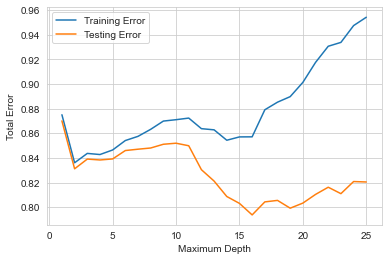

[]

In [94]:
# Because of the class imbalance problem, i am assigning class_weight = 'balanced'
# Instantiate the DecisionTreeClassifier model with criterion gini index

nr.seed(3456)
max_depth_list = [m for m in range(1,26)]

train_errors = list() # Log training errors for each model
test_errors = list() # Log testing errors for each model

for x in max_depth_list:
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=x, random_state=0, class_weight = "balanced") 
    clf_gini.fit(X_train,y_train)
    z_train = clf_gini.predict(X_train)
    z_test = clf_gini.predict(X_test)
    train_errors.append(accuracy_score(y_train, z_train))
    test_errors.append(accuracy_score(y_test, z_test))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.plot() # Show graph

For training error, it is obvious that it will go down and then increases as we maximize the max\_depth parameter of decision tree. On the other hand, for testing error, which is important for the performance of the model, if I select max\_depth too high, then the decision tree might simply overfit the training data without capturing useful patterns as I would like; this will cause testing error to increase. But if I set it too low, that is not good as well; the decision tree is getting little flexibility to capture the patterns in the training data. I have proved my point from the above plot. Keeping it in consideration, i am selecting max\_depth=12 and train the decision tree on it. I can also take max\_depth=15 but the model will ne over fitted then.

In [95]:
# taking max_depth = 5
nr.seed(3456)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0, class_weight = "balanced")

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [96]:
# Predict the Test set results with criterion gini index

y_pred_gini = clf_gini.predict(X_test)

In [97]:
# Check accuracy score with criterion gini index

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8392


<span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);">Here,&nbsp;</span> **y\_test** <span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);">&nbsp;are the true class labels and&nbsp;</span> **y\_pred\_gini** <span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);">&nbsp;are the predicted class labels in the test-set.</span>

<span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);">Now, I will compare the train-set and test-set accuracy to check for overfitting.</span>

In [98]:
y_pred_train_gini = clf_gini.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8465


In [99]:
# Check for overfitting

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Testing set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8465
Testing set score: 0.8392


<span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);">Here, the training-set accuracy score is 0.8465 while the test-set accuracy to be 0.8392. These two values are comparable. So, there is no sign of overfitting. Now its time for the visualization of decision tree.</span>

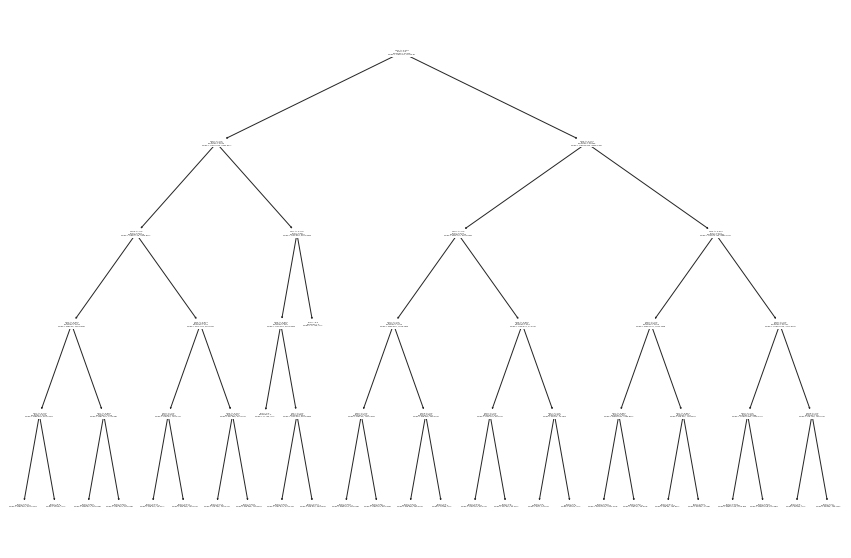

In [100]:
# Visualizing Decision tree
plt.figure(figsize=(15,10))

_ = tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.savefig('decision_tree.pdf') 

In [101]:
# Get important features from decison tree algorithm
bestFeaturesDecisiontree = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_gini.feature_importances_,3)})
bestFeaturesDecisiontree = bestFeaturesDecisiontree.sort_values('importance',ascending=False)
print(bestFeaturesDecisiontree)

                          feature  importance
4                     nr.employed       0.702
3                   cons.conf.idx       0.181
57               poutcome_success       0.027
48                      month_oct       0.027
46                      month_may       0.013
30                default_unknown       0.012
52                day_of_week_thu       0.008
45                      month_mar       0.008
1                        campaign       0.008
39              contact_telephone       0.006
18                marital_married       0.003
0                             age       0.002
33                housing_unknown       0.001
51                day_of_week_mon       0.001
27    education_university.degree       0.001
12                   job_services       0.000
7                job_entrepreneur       0.000
38               contact_cellular       0.000
8                   job_housemaid       0.000
40                      month_apr       0.000
41                      month_aug 

In [102]:
bestFeaturesDecisiontree = bestFeaturesDecisiontree[bestFeaturesDecisiontree['importance'] > 0.000]
bestFeaturesDecisiontree.drop(['importance'], axis=1)
df_bank_scaledDT = df_bank_scaled[bestFeaturesDecisiontree.feature]

In [103]:
# Split the dataframe of important features and target feature y into training and testing sets
                              
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(df_bank_scaledDT, y, test_size = 0.2, random_state = 42)

# check the shapes of training and testing data

X_trainDT.shape, X_testDT.shape

((32940, 15), (8236, 15))

In [104]:
# taking max_depth = 5
nr.seed(3457)
clf_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0, class_weight = "balanced")

# fit the model
clf_gini.fit(X_trainDT, y_trainDT)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [105]:
# Predict the Test set results with criterion gini index

y_pred_giniDT = clf_gini.predict(X_testDT)

In [106]:
# Check accuracy score with criterion gini index

print('Model Test set accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_testDT, y_pred_giniDT)))

Model Test set accuracy score with criterion gini index: 0.8392


In [107]:
y_pred_train_giniDT = clf_gini.predict(X_trainDT)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_trainDT, y_pred_train_giniDT)))

Training-set accuracy score: 0.8465


<span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);">Here, the training-set accuracy score is 0.8465 while the test-set accuracy to be 0.8392 which is same as before eliminating other unimportant features. This represent that the model was initially trained with the same important features and those features which i have eliminated after,&nbsp; does not have any impact towards model performance and they are just wastage.</span>

<span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);"><br></span>

<span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif; background-color: rgb(255, 255, 255);"><b><i><u>Random Forest Algorithm:</u></i></b></span>

In [108]:
# Instantiate model with 10 decision trees
nr.seed(444)
rf = RandomForestClassifier(n_estimators = 10, max_depth=3, class_weight="balanced", random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       random_state=42)

In [109]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

In [110]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('               Score YES      Score NO')
    print('Actual YES    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual NO    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print(' ')
    print('             YES             NO')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    
probabilities = rf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)

                 Confusion matrix
               Score YES      Score NO
Actual YES      6100              1166
Actual NO       378               592

Accuracy        0.81
AUC             0.78
 
             YES             NO
Num case     7266           970
Precision    0.94          0.34
Recall       0.84          0.61


We can improve our Random Forest Algorithm by only feeding in the important features as extracted from this model.

In [111]:
# Get important features from Random Forest Algorithm
bestFeaturesRandomForest = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
bestFeaturesRandomForest = bestFeaturesRandomForest.sort_values('importance',ascending=False)
print(bestFeaturesRandomForest)

                          feature  importance
4                     nr.employed       0.279
56           poutcome_nonexistent       0.251
3                   cons.conf.idx       0.096
39              contact_telephone       0.077
57               poutcome_success       0.066
46                      month_may       0.041
30                default_unknown       0.037
6                 job_blue-collar       0.029
0                             age       0.023
38               contact_cellular       0.022
40                      month_apr       0.022
2                        previous       0.017
1                        campaign       0.013
45                      month_mar       0.006
42                      month_dec       0.006
48                      month_oct       0.004
49                      month_sep       0.003
55               poutcome_failure       0.002
10                    job_retired       0.002
36                   loan_unknown       0.001
13                    job_student 

In [112]:
bestFeaturesRandomForest = bestFeaturesRandomForest[bestFeaturesRandomForest['importance'] > 0.000]
bestFeaturesRandomForest.drop(['importance'], axis=1)
df_bank_scaledRF = df_bank_scaled[bestFeaturesRandomForest.feature]

In [113]:
# Split the dataframe of important features and target feature y into training and testing sets
                              
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(df_bank_scaledRF, y, test_size = 0.2, random_state = 42)

# check the shapes of training and testing data

X_trainRF.shape, X_testRF.shape

((32940, 22), (8236, 22))

In [114]:
# Now again instantiate model with 10 decision trees but with important features only
nr.seed(444)
rf2 = RandomForestClassifier(n_estimators = 10, max_depth=3, class_weight="balanced", random_state = 42)

# Train the model on training data
rf2.fit(X_trainRF, y_trainRF)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       random_state=42)

In [115]:
# Again Using the forest's predict method on the test data
y_predRF = rf2.predict(X_testRF)

In [116]:
labels = y_testRF
scores = y_predRF

In [117]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('               Score YES      Score NO')
    print('Actual YES    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual NO    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print(' ')
    print('             YES             NO')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    
probabilities = rf2.predict_proba(X_testRF)
print_metrics(y_testRF, probabilities, 0.5)

                 Confusion matrix
               Score YES      Score NO
Actual YES      6283               983
Actual NO       385               585

Accuracy        0.83
AUC             0.79
 
             YES             NO
Num case     7266           970
Precision    0.94          0.37
Recall       0.86          0.60


For total **8236** clients ==\>

**True Positive (TP)** = **6283**; meaning 6283 positive class (YES) data points were correctly classified by the model

**True Negative (TN)** = **585**; meaning 585 negative class data points (NO) were correctly classified by the model

**False Positive (FP)** = **983**; meaning 983 negative class data points (NO) were incorrectly classified as belonging to the positive class (YES) by the model ==\> **(Type I Error)**

**False Negative (FN)** = **385**; meaning 385 positive class data points (YES) were incorrectly classified as belonging to the negative class (NO) by the model ==\> **(Type II Error)**

**Accuracy of model ==\> 83%**

**AUC of model ==\> 79%**

Hence, it is seen that model has been improved. Accuracy increases to 83% but AUC of the model increased a little bit to 79%.

**_<u>Resolving Class Imbalance Problem</u>_**

<span style="font-size: 15px;">For class imbalance problem, i am applying SMOTE algorithm. SMOTE algorithm works in 4 simple steps:</span>

<span style="color: rgb(89, 88, 88); font-family: roboto, sans-serif; font-size: 15px;">1. Choose a minority class as the input vector</span>

<span style="font-size: 15px;">2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)</span>

<span style="font-size: 15px;">3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor</span>

<span style="font-size: 15px;">4. Repeat the steps until data is balanced</span>

In [118]:
smote = SMOTE()

# fit predictor and target variable
df_bank_scaled_smote, y_smote = smote.fit_resample(df_bank_scaled, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 36537, 1: 4639})
Resample dataset shape Counter({0: 36537, 1: 36537})


In [119]:
# Split the dataframe and target feature y into training and testing sets
                              
X_train, X_test, y_train, y_test = train_test_split(df_bank_scaled_smote, y_smote, test_size = 0.2, random_state = 42)

# check the shapes of training and testing data

X_train.shape, X_test.shape

((58459, 58), (14615, 58))

**_<u>Neural Network:</u>_**

Now I will define and fit a neural network model. The code in the cell below defines a three hidden layer neural network model with 11 units. The code uses the MLPClassifer function from the Scikit Lean neural\_network package. MLPClassifier stands for Multi-Layer Perceptron classifier which in the name itself connects to a Neural Network. The model is then fit and then evaluate it.

In [125]:
nr.seed(1115)
nn_mod = MLPClassifier(hidden_layer_sizes = (11,3), max_iter=550)
nn_mod.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(11, 3), max_iter=550)

In [126]:
scores = nn_mod.predict(X_test)

In [127]:
def print_metrics_2(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('             YES             NO')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])

print_metrics_2(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6475               877
Actual negative      1808              5455

Accuracy        0.82
 
             YES             NO
Num case     7352          7263
Precision    0.78          0.86
Recall       0.88          0.75


For total **14615** clients ==\>

**True Positive (TP)** = **6475**; meaning 6475 positive class (YES) data points were correctly classified by the model

**True Negative (TN)** = **5455**; meaning 5455 negative class data points (NO) were correctly classified by the model

**False Positive (FP)** = **877**; meaning 877 negative class data points (NO) were incorrectly classified as belonging to the positive class (YES) by the model ==\> **(Type I Error)**

**False Negative (FN)** = **1808**; meaning 1808 positive class data points (YES) were incorrectly classified as belonging to the negative class (NO) by the model ==\> **(Type II Error)**

**Accuracy of model ==\> 81%**

**<u>Summary</u>**

So let’s quickly go through what I did in this case study to achieve the desired performance what I was looking for.

1\. The objective of this case study was to predict whether a customer will subscribe to a term deposit or not given the data of the customer.

2\. There were a lot of categorical variables and some numerical variables which capture various information about the customer and the bank-customer relationship.

3\. First I did EDA and figured out that there are no null values for the data, and the data is imbalanced, where “no” is the majority class.

4\. After doing univariate analysis which include histogram and box plot for every numerical variable, and side by side bar plots for each categorical variable. Correlation matrix is also made to get the idea about strongly correlated variables. Removing some features which are highly correlated or which does not help very much when it comes to predict the target variable.  But on the other hand, some numerical features tend to predict the target variable much better.

5\. Find out the percentage of class imbalance in our dataset.

6\. After basic data preprocessing, I encoded the categorical data through One hot encoding method and also apply Normalization Scaling technique to the dataframe. 

6\. Decison tree algorithm =\> Plot train and test error graph and decide max\_depth keeping in view of the graph. Got 83.92% accuracy but to get more depth, i extracted the important features and put it again into the decision tree algorithm. Now the accuracy is still 83.92% which shows that those features which i eliminated were not showing any impact on the target feature.

7\. Random Forest Algorithm =\> Using Random forest algorithm, train the model using 10 decision tress with max\_depth of 5. Confusion matrix is used for the evaluation of model. i got the accuracy of 81% and AUC is 78%. But i cannot rely on these results, and to get more accurate and improved results, i extracted the important features and put it again into the Random Forest Algorithm. Now the accuracy improved to 83% and AUC is now 79%.

8\. SMOTE is used to resolve class imbalance problem.

9\. Neural Network =\> Implementing three hidden layer neural network model with 11 units, got the accuracy of 81%.

10\. After implementing all the models, I realized that the model which gave the best performance was Decision tree algorithm.